In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from keras.models import Sequential

import glob, os, random

Using TensorFlow backend.
C:\Users\qdio8\ana\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\qdio8\ana\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\qdio8\ana\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\qdio8\ana\envs\tensorflow\lib\site-packag

In [2]:
base_path = 'C:\\Users\\qdio8\\Desktop\\garbage (ver. 4.2)\\garbage (ver 4.2)'

img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))

print(len(img_list))

4627


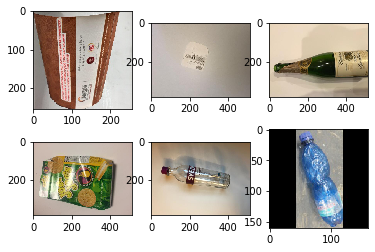

In [3]:
for i, img_path in enumerate(random.sample(img_list, 6)):
    img = load_img(img_path)
    img = img_to_array(img, dtype=np.uint8)

    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

validation_generator = test_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

print(labels)

Found 4456 images belonging to 6 classes.
Found 491 images belonging to 6 classes.
{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [7]:
model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu',
           input_shape=(300, 300, 3)),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2), 
    
    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2), 
    
    Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2), 
    
    Flatten(),
    
    Dense(64, activation='relu'),
    
    Dense(6, activation='softmax') 
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 37, 37, 256)      

In [8]:
hist = model.fit_generator(train_generator,epochs=20, validation_data=validation_generator,)


Epoch 1/20
279/279 [==============================] - 1006s 4s/step - loss: 1.4690 - acc: 0.3876 - val_loss: 1.9920 - val_acc: 0.3910
Epoch 2/20
279/279 [==============================] - 1008s 4s/step - loss: 1.2423 - acc: 0.4717 - val_loss: 1.4883 - val_acc: 0.3747
Epoch 3/20
279/279 [==============================] - 1012s 4s/step - loss: 1.1641 - acc: 0.5092 - val_loss: 1.4259 - val_acc: 0.3870
Epoch 4/20
279/279 [==============================] - 1004s 4s/step - loss: 1.0835 - acc: 0.5440 - val_loss: 1.9521 - val_acc: 0.4501
Epoch 5/20
279/279 [==============================] - 1003s 4s/step - loss: 1.0433 - acc: 0.5741 - val_loss: 1.7213 - val_acc: 0.4501
Epoch 6/20
279/279 [==============================] - 1019s 4s/step - loss: 1.0052 - acc: 0.5927 - val_loss: 1.2940 - val_acc: 0.4929
Epoch 7/20
279/279 [==============================] - 1005s 4s/step - loss: 0.9606 - acc: 0.6102 - val_loss: 0.8786 - val_acc: 0.5010
Epoch 8/20
279/279 [==============================] - 1022s 4

In [9]:
print("-- Evaluate --")
scores = model.evaluate_generator(validation_generator, steps=31)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
acc: 60.49%


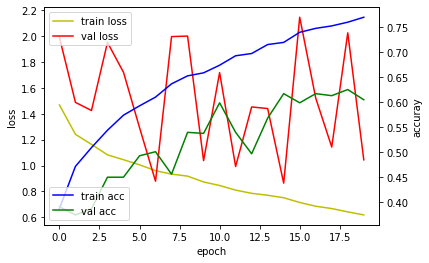

In [10]:
# 모델 학습 그래프 확인
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

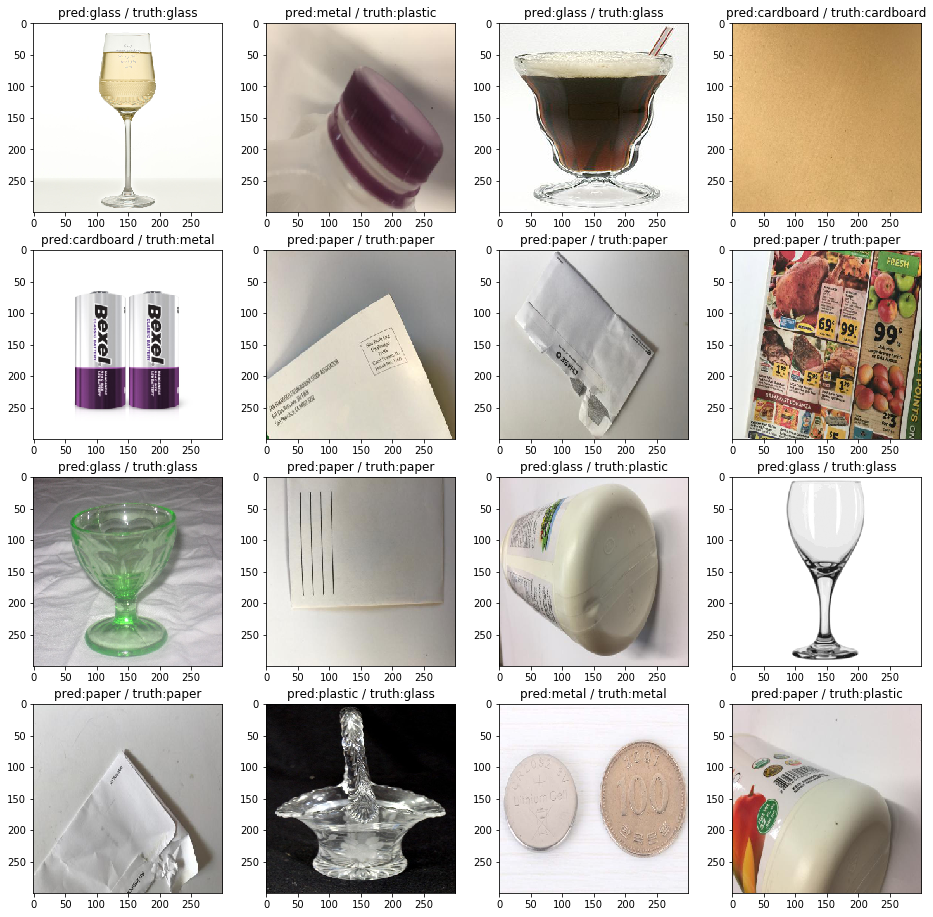

In [11]:
test_x, test_y = validation_generator.__getitem__(1)

preds = model.predict(test_x)

plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])